In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


[1] "diabetes-data-set"

# Decision Tree Technique using the Diabetes dataset

## About Dataset
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes. [Link to the dataset.](https://www.kaggle.com/datasets/mathchi/diabetes-data-set) 

## Overview 
I used decision tree to determine whether the person has diabetes or not. The model is useful for doctors to make a prediction and recommend the user on the best option for testing. 

## Data loading and understanding

Reading dataset from link

In [2]:
diabetes<- read.csv("../input/diabetes-data-set/diabetes.csv")

Data understanding

In [3]:
head(diabetes)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<int>,<int>
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1
6,5,116,74,0,0,25.6,0.201,30,0


In [4]:
dim(diabetes)

[1] 768   9

#### Analysis: 
The dataset has 768 instances and 9 variables. 

In [5]:
summary(diabetes)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
    Outcome  

#### Analysis: 
The class label is the variable *'Outcome'*. We have to factorize the class label to predict the values.

In [6]:
diabetes$Outcome= as.factor(diabetes$Outcome)
summary(diabetes)

  Pregnancies        Glucose      BloodPressure    SkinThickness  
 Min.   : 0.000   Min.   :  0.0   Min.   :  0.00   Min.   : 0.00  
 1st Qu.: 1.000   1st Qu.: 99.0   1st Qu.: 62.00   1st Qu.: 0.00  
 Median : 3.000   Median :117.0   Median : 72.00   Median :23.00  
 Mean   : 3.845   Mean   :120.9   Mean   : 69.11   Mean   :20.54  
 3rd Qu.: 6.000   3rd Qu.:140.2   3rd Qu.: 80.00   3rd Qu.:32.00  
 Max.   :17.000   Max.   :199.0   Max.   :122.00   Max.   :99.00  
    Insulin           BMI        DiabetesPedigreeFunction      Age       
 Min.   :  0.0   Min.   : 0.00   Min.   :0.0780           Min.   :21.00  
 1st Qu.:  0.0   1st Qu.:27.30   1st Qu.:0.2437           1st Qu.:24.00  
 Median : 30.5   Median :32.00   Median :0.3725           Median :29.00  
 Mean   : 79.8   Mean   :31.99   Mean   :0.4719           Mean   :33.24  
 3rd Qu.:127.2   3rd Qu.:36.60   3rd Qu.:0.6262           3rd Qu.:41.00  
 Max.   :846.0   Max.   :67.10   Max.   :2.4200           Max.   :81.00  
 Outcome
 0:5

#### Analysis: 
After the class label is factorized, we can see that the outcome result is either 0 or 1. There are 500 of False (0) outcomes and 268 of True (1) outcomes. 

## Sampling
For sampling, we will use caTools and use 80% of the data for training and the remaining for testing. 

In [7]:
library(caTools)
sample = sample.split(diabetes$Outcome, SplitRatio = 0.8)
train = subset(diabetes, sample == TRUE)
test  = subset(diabetes, sample == FALSE)

In [8]:
dim(train)

[1] 614   9

In [9]:
dim(test)

[1] 154   9

##### Analysis: 
614 instances will be used for training and 154 for testing. 

## Model building
ctree() function was used to build the model with the training dataset. To figure the best attributes for model training, we use information.gain() function from FSeclector library. 

In [10]:
install.packages('FSelector')
library('FSelector')
best_attr<- information.gain(Outcome ~ . , data=train)
## this will give the features with their importance number, the greater the number the more important it is
best_attr

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RWekajars’, ‘rJava’, ‘RWeka’




,attr_importance
,<dbl>
Pregnancies,0.02501712
Glucose,0.11303987
BloodPressure,0.00000000
SkinThickness,0.00000000
Insulin,0.00000000
BMI,0.04650752
DiabetesPedigreeFunction,0.00000000
Age,0.05139881


In [11]:
library(party)

## to build the model, I am using the best 4 attributes.
model<- ctree(formula = Outcome ~Glucose+ Insulin+ Age+ BMI, data=train)
model

Loading required package: grid

Loading required package: mvtnorm

Loading required package: modeltools

Loading required package: stats4

Loading required package: strucchange

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: sandwich


Attaching package: ‘strucchange’


The following object is masked from ‘package:stringr’:

    boundary





	 Conditional inference tree with 8 terminal nodes

Response:  Outcome 
Inputs:  Glucose, Insulin, Age, BMI 
Number of observations:  614 

1) Glucose <= 142; criterion = 1, statistic = 122.139
  2) BMI <= 26.3; criterion = 1, statistic = 22.675
    3) BMI <= 0; criterion = 0.951, statistic = 6.232
      4)*  weights = 9 
    3) BMI > 0
      5)*  weights = 107 
  2) BMI > 26.3
    6) Glucose <= 94; criterion = 1, statistic = 16.252
      7) Glucose <= 65; criterion = 0.956, statistic = 6.447
        8)*  weights = 7 
      7) Glucose > 65
        9)*  weights = 78 
    6) Glucose > 94
      10)*  weights = 273 
1) Glucose > 142
  11) Glucose <= 154; criterion = 0.955, statistic = 6.414
    12) Age <= 42; criterion = 0.957, statistic = 6.485
      13)*  weights = 31 
    12) Age > 42
      14)*  weights = 15 
  11) Glucose > 154
    15)*  weights = 94 

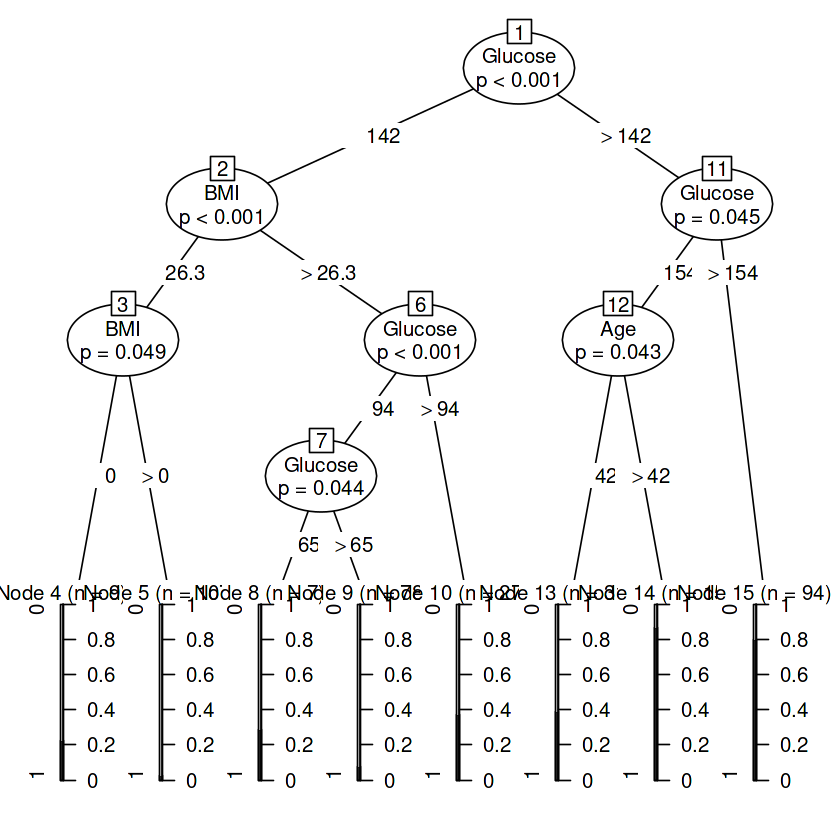

In [12]:
## the graphical representation of the model 
plot(model)

## Prediction and accuracy test

In [13]:
# predict the test dataset using the model we built
pred <- predict(model, newdata = test)
pred

[1] 1 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0
 [38] 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0
 [75] 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[112] 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 1 0 0
[149] 0 0 1 0 1 0
Levels: 0 1

In [14]:
# confusion matrix to denote the correctly and incorrectly allocated predictions 
ConfMatrix<- table(pred, test$Outcome)
ConfMatrix

    
pred  0  1
   0 92 30
   1  8 24

In [15]:
# measuring the accuracy of the model by building a function
modelAccuracy <- function(x){sum(diag(x)/(sum(rowSums(x)))) * 100}
modelAccuracy(ConfMatrix)

[1] 75.32468

#### Analysis: 
The model I built is 72% accurate. From the 154 instances that were tested by the model there were 43 errors.